In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('tested.csv')
original = data

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data.shape

(418, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# cabin consist of mostly NULL values so we should remove it from data set

In [6]:
data.drop(columns=['Cabin'],inplace=True)

In [7]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [25]:
data.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

# Managing Null values

In [8]:
data['Fare'].fillna(data['Fare'].mean(),inplace=True)

In [9]:
data['Age'].fillna(data['Age'].median(),inplace=True)

# Now all null values have been filled

In [10]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Analysis of Data

In [11]:
data[data['Pclass']==1]['Survived'].value_counts()

0    57
1    50
Name: Survived, dtype: int64

In [12]:
data[data['Pclass']==2]['Survived'].value_counts()

0    63
1    30
Name: Survived, dtype: int64

# Most number of people who died were present in 3 passenger class


In [13]:
data[data['Pclass']==3]['Survived'].value_counts()


0    146
1     72
Name: Survived, dtype: int64

# Survival chance in terms of percentage according to passenger class

In [16]:
data.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64

In [23]:
data[data['Sex']=='female'].shape[0]

152

In [25]:
data[data['Sex']=='male'].shape[0]

266

# According to this data set females are saved and all males died 

In [27]:
data.groupby(['Sex'])['Survived'].mean()

Sex
female    1.0
male      0.0
Name: Survived, dtype: float64

# with the help of this graph we can see that childern and older people have died less

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

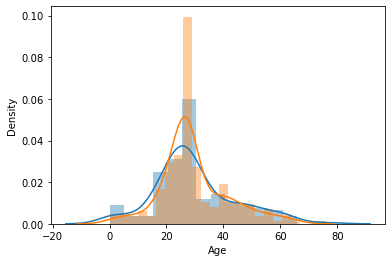

In [35]:
sns.distplot(data['Age'][data['Survived']==1])
sns.distplot(data['Age'][data['Survived']==0])

In [ ]:
data.drop(columns='Ticket',inplace = True)

In [40]:
data.replace({'Sex':{'male':0, 'female':1},'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [45]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,27.0,0,0,8.0500,0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,108.9000,1
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,7.2500,0
416,1308,0,3,"Ware, Mr. Frederick",0,27.0,0,0,8.0500,0


In [ ]:
data.drop(columns={'PassengerId','Name','Parch'},axis=1, inplace=True)

# Generating training and testing data

In [52]:
X = data.drop(columns='Survived',axis=1)
Y = data['Survived']

# Training and Testing

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Training Model

In [62]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [63]:
prediction = model.predict(X_test)

In [66]:
testing_data_accuracy = accuracy_score(prediction, Y_test)

In [67]:
testing_data_accuracy

1.0

In [69]:
from sklearn import metrics

In [70]:
score = model.score(X_test,Y_test)
print(score)

1.0
